# IMPORTING LIBRARIES

In [30]:
import numpy as np
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import sklearn
import joblib
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

<center><H1> DATA PRE-PROCESSING </H1></center>

## LOADING OF DATASET

In [31]:
data = pd.read_csv('marketing_campaign.csv',delimiter='\t')
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntDrinks,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


## Dropping Unnecessary Columns

In [32]:
data = data.drop(columns = ['Dt_Customer','Recency','Complain','NumDealsPurchases','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response','Z_CostContact','Z_Revenue'])
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,MntDrinks,MntFruits_and_veg,MntNon_veg_Products,MntGroceries,MntSweetProducts,MntSnacks,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2
0,5524,1957,Graduation,Single,58138.0,0,0,635,88,546,172,88,88,8,10,4,7,0,0
1,2174,1954,Graduation,Single,46344.0,1,1,11,1,6,2,1,6,1,1,2,5,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,426,49,127,111,21,42,8,2,10,4,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,11,4,20,10,3,5,2,0,4,6,0,0
4,5324,1981,PhD,Married,58293.0,1,0,173,43,118,46,27,15,5,3,6,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,709,43,182,42,118,247,9,3,4,5,0,0
2236,4001,1946,PhD,Together,64014.0,2,1,406,0,30,0,0,8,8,2,5,7,1,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,908,48,217,32,12,24,2,3,13,6,0,0
2238,8235,1956,Master,Together,69245.0,0,1,428,30,214,80,30,61,6,5,10,3,0,0


## Explanation of Column

#### People:
<ul>
    <li><b>ID</b>: Customer's unique identifier</li>
    <li><b>Year_Birth</b>: Customer's birth year</li>
    <li><b>Education</b>: Customer's education level</li>
    <li><b>Marital_Status</b>: Customer's marital status</li>
    <li><b>Income</b>: Customer's yearly household income</li>
    <li><b>Kidhome</b>: Number of children in customer's household</li>
    <li><b>Teenhome</b>: Number of teenagers in customer's household</li>
</ul>

#### Products:
<ul>
    <li><b>MntDrinks</b>: Amount spent on Drink in last 2 years</li>
    <li><b>MntFruits_and_veg</b>: Amount spent on fruits and vegetables in last 2 years</li>
    <li><b>MntNon_veg_Products</b>: Amount spent on non-veg Products in last 2 years</li>
    <li><b>MntGroceries</b>: Amount spent on Groceries in last 2 years</li>
    <li><b>MntSweetProducts</b>: Amount spent on sweets in last 2 years</li>
    <li><b>MntSnacks</b>: Amount spent on Snacks in last 2 years</li>
</ul>
    
#### Misc
<ul>
    <li><b>NumWebPurchases</b>: Number of purchases made through the company’s website</li>
    <li><b>NumCatalogPurchases</b>: Number of purchases made using a catalogue</li>
    <li><b>NumStorePurchases</b>: Number of purchases made directly in stores</li>
    <li><b>NumWebVisitsMonth</b>: Number of visits to company’s website in the last month</li>
</ul>

#### Promotion
<ul>
    <li><b>AcceptedCmp1</b>: 1 if customer accepted the offer in the 1st campaign, 0 otherwise</li>
    <li><b>AcceptedCmp2</b>: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise</li>
</ul>


In [33]:
data.shape

(2240, 19)

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   MntDrinks            2240 non-null   int64  
 8   MntFruits_and_veg    2240 non-null   int64  
 9   MntNon_veg_Products  2240 non-null   int64  
 10  MntGroceries         2240 non-null   int64  
 11  MntSweetProducts     2240 non-null   int64  
 12  MntSnacks            2240 non-null   int64  
 13  NumWebPurchases      2240 non-null   int64  
 14  NumCatalogPurchases  2240 non-null   int64  
 15  NumStorePurchases    2240 non-null   i

In [35]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,MntDrinks,MntFruits_and_veg,MntNon_veg_Products,MntGroceries,MntSweetProducts,MntSnacks,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,4.084821,2.662054,5.790179,5.316518,0.064286,0.013393
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,2.778714,2.923101,3.250958,2.426645,0.245316,0.114976
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000


## Checking for Missing Values

In [36]:
data.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
MntDrinks,0
MntFruits_and_veg,0
MntNon_veg_Products,0


In [37]:
mean_value=round(data['Income'].mean(),1)
mean_value

np.float64(52247.3)

In [38]:
data['Income'] = data['Income'].fillna(mean_value)
data.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,0
Kidhome,0
Teenhome,0
MntDrinks,0
MntFruits_and_veg,0
MntNon_veg_Products,0


## Checking for Duplicated Values

In [39]:
data.duplicated().sum()

np.int64(0)

## Dealing with Outliers

In [40]:
outlier_columns = ['Year_Birth','Income','MntDrinks','MntFruits_and_veg','MntNon_veg_Products','MntGroceries','MntSweetProducts','MntSnacks','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth']

/tmp/ipython-input-1192248636.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[outlier_columns[i]], ax=ax[i // 3, i % 3])
/tmp/ipython-input-1192248636.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[outlier_columns[i]], ax=ax[i // 3, i % 3])
/tmp/ipython-input-1192248636.py:6: 

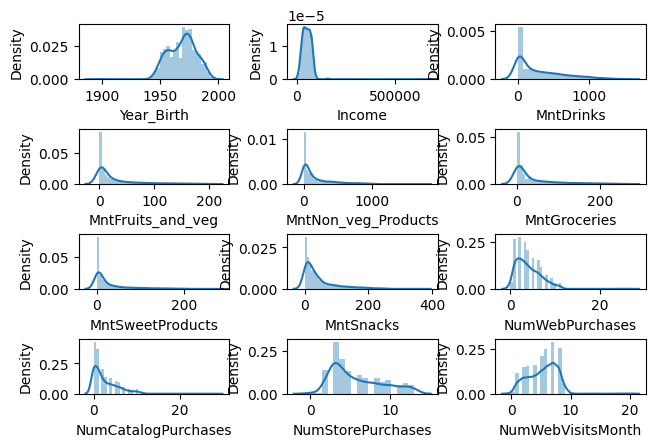

In [41]:
fig, ax = plt.subplots(4, 3)
fig.tight_layout(h_pad=2)

# Plot on specified subplots
for i in range(len(outlier_columns)):
    sns.distplot(data[outlier_columns[i]], ax=ax[i // 3, i % 3])

#define subplot xlabel
for i in range(len(outlier_columns)):
    ax[i // 3, i % 3].set_xlabel(outlier_columns[i])

plt.subplots_adjust(top=0.85)

#display the plots
plt.show()

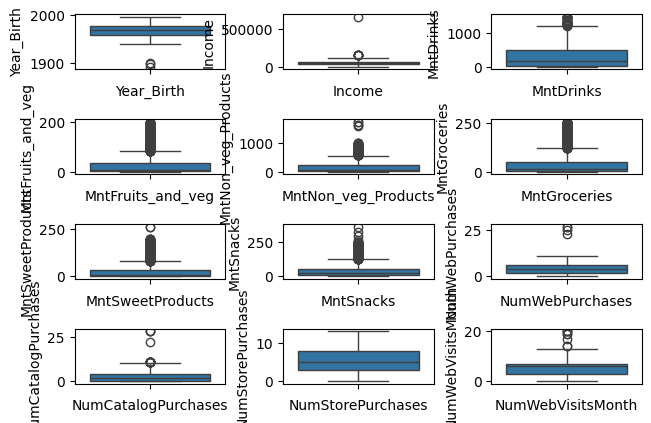

In [42]:
fig, ax = plt.subplots(4, 3)
fig.tight_layout(h_pad=2)

# Plot on specified subplots
for i in range(len(outlier_columns)):
    sns.boxplot(data[outlier_columns[i]], ax=ax[i // 3, i % 3])

#define subplot xlabel
for i in range(len(outlier_columns)):
    ax[i // 3, i % 3].set_xlabel(outlier_columns[i])

plt.subplots_adjust(top=0.85)

#display the plots
plt.show()

In [43]:
outlier_columns = ['Year_Birth','Income','MntDrinks','MntFruits_and_veg','MntNon_veg_Products','MntGroceries','MntSweetProducts','MntSnacks','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth']
for column in outlier_columns:
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3-q1
    minimum_value = int(q1-1.5*iqr)
    maximum_value = int(q3+1.5*iqr)

    print(column)
    print("Minimum Value = ",minimum_value);
    print("Maximum Value = ",maximum_value);
    #Capping
    data[column] = np.where(data[column]>maximum_value,maximum_value,
                                    np.where(data[column]<minimum_value,minimum_value,
                                  data[column]))
    data[column] = data[column].astype('int64')
    print()

Year_Birth
Minimum Value =  1932
Maximum Value =  2004

Income
Minimum Value =  -13587
Maximum Value =  117416

MntDrinks
Minimum Value =  -697
Maximum Value =  1225

MntFruits_and_veg
Minimum Value =  -47
Maximum Value =  81

MntNon_veg_Products
Minimum Value =  -308
Maximum Value =  556

MntGroceries
Minimum Value =  -67
Maximum Value =  120

MntSweetProducts
Minimum Value =  -47
Maximum Value =  81

MntSnacks
Minimum Value =  -61
Maximum Value =  126

NumWebPurchases
Minimum Value =  -4
Maximum Value =  12

NumCatalogPurchases
Minimum Value =  -6
Maximum Value =  10

NumStorePurchases
Minimum Value =  -4
Maximum Value =  15

NumWebVisitsMonth
Minimum Value =  -3
Maximum Value =  13



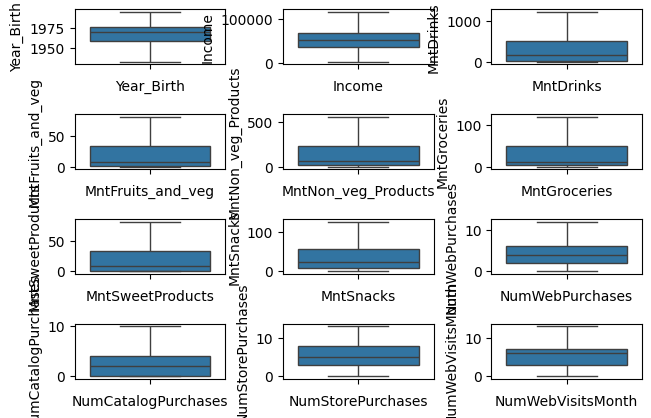

In [44]:
fig, ax = plt.subplots(4, 3)
fig.tight_layout(h_pad=2)

# Plot on specified subplots
for i in range(len(outlier_columns)):
    sns.boxplot(data[outlier_columns[i]], ax=ax[i // 3, i % 3])

#define subplot xlabel
for i in range(len(outlier_columns)):
    ax[i // 3, i % 3].set_xlabel(outlier_columns[i])

plt.subplots_adjust(top=0.85)

#display the plots
plt.show()

## Dealing with Categorical Values

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4   Income               2240 non-null   int64 
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   MntDrinks            2240 non-null   int64 
 8   MntFruits_and_veg    2240 non-null   int64 
 9   MntNon_veg_Products  2240 non-null   int64 
 10  MntGroceries         2240 non-null   int64 
 11  MntSweetProducts     2240 non-null   int64 
 12  MntSnacks            2240 non-null   int64 
 13  NumWebPurchases      2240 non-null   int64 
 14  NumCatalogPurchases  2240 non-null   int64 
 15  NumStorePurchases    2240 non-null   int64 
 16  NumWeb

In [46]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,MntDrinks,MntFruits_and_veg,MntNon_veg_Products,MntGroceries,MntSweetProducts,MntSnacks,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2
0,5524,1957,Graduation,Single,58138,0,0,635,81,546,120,81,88,8,10,4,7,0,0
1,2174,1954,Graduation,Single,46344,1,1,11,1,6,2,1,6,1,1,2,5,0,0
2,4141,1965,Graduation,Together,71613,0,0,426,49,127,111,21,42,8,2,10,4,0,0
3,6182,1984,Graduation,Together,26646,1,0,11,4,20,10,3,5,2,0,4,6,0,0
4,5324,1981,PhD,Married,58293,1,0,173,43,118,46,27,15,5,3,6,5,0,0


In [47]:
education_column = data['Education'].sort_values().unique()
education_column

array(['2n Cycle', 'Basic', 'Graduation', 'Master', 'PhD'], dtype=object)

In [48]:
for i in range(len(education_column)):
    data['Education']=np.where(data['Education']==education_column[i],i,data['Education'])
data['Education'] = data['Education'].astype('int64')
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,MntDrinks,MntFruits_and_veg,MntNon_veg_Products,MntGroceries,MntSweetProducts,MntSnacks,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2
0,5524,1957,2,Single,58138,0,0,635,81,546,120,81,88,8,10,4,7,0,0
1,2174,1954,2,Single,46344,1,1,11,1,6,2,1,6,1,1,2,5,0,0
2,4141,1965,2,Together,71613,0,0,426,49,127,111,21,42,8,2,10,4,0,0
3,6182,1984,2,Together,26646,1,0,11,4,20,10,3,5,2,0,4,6,0,0
4,5324,1981,4,Married,58293,1,0,173,43,118,46,27,15,5,3,6,5,0,0


In [49]:
data['Marital_Status'].sort_values().unique()

array(['Absurd', 'Alone', 'Divorced', 'Married', 'Single', 'Together',
       'Widow', 'YOLO'], dtype=object)

In [50]:
#Forming into distinctive Category
data['Marital_Status'] = data['Marital_Status'].replace(['Alone', 'Absurd', 'YOLO'], 'Single')
data['Marital_Status'] = data['Marital_Status'].replace(['Together', 'Married'], 'Couple')
data['Marital_Status'].sort_values().unique()

array(['Couple', 'Divorced', 'Single', 'Widow'], dtype=object)

In [51]:
marital_column = ['Single','Couple','Divorced','Widow']
for i in range(len(marital_column)):
    data['Marital_Status']=np.where(data['Marital_Status']==marital_column[i],i,data['Marital_Status'])
data['Marital_Status'] = data['Marital_Status'].astype('int64')
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,MntDrinks,MntFruits_and_veg,MntNon_veg_Products,MntGroceries,MntSweetProducts,MntSnacks,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2
0,5524,1957,2,0,58138,0,0,635,81,546,120,81,88,8,10,4,7,0,0
1,2174,1954,2,0,46344,1,1,11,1,6,2,1,6,1,1,2,5,0,0
2,4141,1965,2,1,71613,0,0,426,49,127,111,21,42,8,2,10,4,0,0
3,6182,1984,2,1,26646,1,0,11,4,20,10,3,5,2,0,4,6,0,0
4,5324,1981,4,1,58293,1,0,173,43,118,46,27,15,5,3,6,5,0,0


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   ID                   2240 non-null   int64
 1   Year_Birth           2240 non-null   int64
 2   Education            2240 non-null   int64
 3   Marital_Status       2240 non-null   int64
 4   Income               2240 non-null   int64
 5   Kidhome              2240 non-null   int64
 6   Teenhome             2240 non-null   int64
 7   MntDrinks            2240 non-null   int64
 8   MntFruits_and_veg    2240 non-null   int64
 9   MntNon_veg_Products  2240 non-null   int64
 10  MntGroceries         2240 non-null   int64
 11  MntSweetProducts     2240 non-null   int64
 12  MntSnacks            2240 non-null   int64
 13  NumWebPurchases      2240 non-null   int64
 14  NumCatalogPurchases  2240 non-null   int64
 15  NumStorePurchases    2240 non-null   int64
 16  NumWebVisitsMonth    224

## Customer Segmentation using K-Means Clustering

Original 'Education' categories: [0 1 2 3]
Encoded 'Education' values: [2 4 3 1 0]


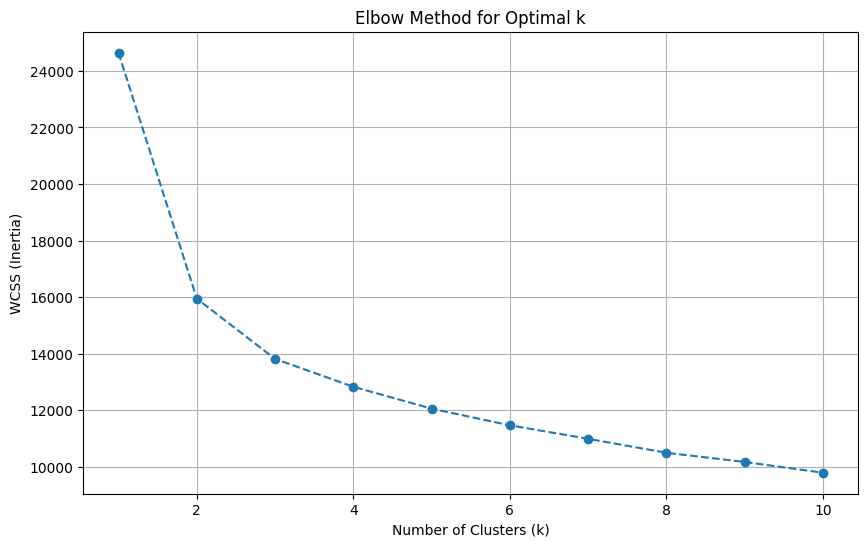


Customer Segments Created:
Cluster
3    621
2    605
1    537
0    477
Name: count, dtype: int64

--- Cluster Analysis (Mean Values) ---
                  ID   Year_Birth  Education  Marital_Status        Income  \
Cluster                                                                      
0        5541.371069  1964.142558   2.832285        1.077568  61299.362683   
1        5542.884544  1964.586592   2.487896        0.981378  42615.275605   
2        5657.690909  1976.885950   2.102479        0.846281  30272.074380   
3        5609.938808  1968.331723   2.259259        0.943639  73690.056361   

          Kidhome  Teenhome   MntDrinks  MntFruits_and_veg  \
Cluster                                                      
0        0.083857  0.876310  522.421384          17.628931   
1        0.774674  1.040968   87.059590           3.778399   
2        0.819835  0.000000   39.904132           6.785124   
3        0.069243  0.252818  574.307568          54.779388   

         MntNon_veg_

In [53]:
le = LabelEncoder()
data['Education_n'] = le.fit_transform(data['Education'])
data['Marital_Status_n'] = le.fit_transform(data['Marital_Status'])

print("Original 'Education' categories:", le.classes_)
print("Encoded 'Education' values:", data['Education_n'].unique())

features_for_clustering = data[['Income', 'Kidhome', 'Teenhome',
                                'MntDrinks', 'MntFruits_and_veg', 'MntNon_veg_Products',
                                'MntGroceries', 'MntSweetProducts', 'MntSnacks',
                                'Education_n', 'Marital_Status_n']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_for_clustering)

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.grid(True)
plt.show()

OPTIMAL_K = 4

kmeans = KMeans(n_clusters=OPTIMAL_K, init='k-means++', random_state=42, n_init=10)
data['Cluster'] = kmeans.fit_predict(scaled_features)

print("\nCustomer Segments Created:")
print(data['Cluster'].value_counts())
print("\n--- Cluster Analysis (Mean Values) ---")
print(data.groupby('Cluster').mean(numeric_only=True))


## Train a Classifier to Predict the Cluster for NEW Customers

In [54]:
X = data[['Income', 'Kidhome', 'Teenhome', 'Education_n', 'Marital_Status_n']]

y = data['Cluster']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nTraining set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"\nClassifier Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Training set shape: (1792, 5)
Testing set shape: (448, 5)

Classifier Accuracy: 0.8103

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.71      0.65        96
           1       0.91      0.79      0.85       107
           2       0.94      0.96      0.95       121
           3       0.78      0.76      0.77       124

    accuracy                           0.81       448
   macro avg       0.81      0.80      0.81       448
weighted avg       0.82      0.81      0.81       448



## Save All the Necessary Models

In [55]:
joblib.dump(scaler, 'scaler.joblib')
joblib.dump(kmeans, 'kmeans_model.joblib')
joblib.dump(classifier, 'cluster_classifier_model.joblib')


['cluster_classifier_model.joblib']